# __Education Project__

## Introduction

#### For this project, we are looking to use the data science methodology to answer the question of whether school performance is predicted by socioeconomic factors in the United States. In this case, we are going to compare ACT Scores in school districts to multiple socioeconomic factors. We are also going to add a factor that is based on a school's Title 1 eligibility status.

### Import Necessary Libraries for Analysi and Importing Datasets

#### Our first step is to import our necessary libraries into our notebook, which consist of 
#### - pandas (pd) for our data analysis functions, 
#### - numpy(np) for additional mathematical tools, 
#### - matplotlib.pyplot(plt)__ for our graphs.
#### - seaborn (sns), which acts as an additional data visualization project built on matplotlib (we will also set our grid for sns to be white at this stage).
#### - wget for importing large datasets.
#### - StandardScaler from sklearn.preprocessing for model processiong.
#### - stats.models.formula.api and stats.models.api for Modelling.
#### - r2_score, mean_squared_error, mean_absolute_error from sklearn.metrics from sklearn.metrics +
#### -anova_lm from statsmodels.stats.anova for model metrics and analysis.

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
#set the plotting style
sns.set_style("whitegrid")

import wget as wget

# Model preprocessing
from sklearn.preprocessing import StandardScaler

#Modelling
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm

import plotly.offline as po
import plotly.graph_objs as pg

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#### Now that we have successfully imported our libraries and graphics tools, we can now being importing our datasets from EdGap and the National Center for Education Statistics.

## Import Datasets + head/info Checks

In [2]:
edgap = pd.read_excel('https://raw.githubusercontent.com/CameronMangione/education/main/data/EdGap_data.xlsx')

/opt/anaconda3/lib/python3.13/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [3]:
!wget -O ccd_sch_029_1617_w_1a_11212017.csv "https://www.dropbox.com/s/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv?dl=0"

--2025-10-22 13:07:39--  https://www.dropbox.com/s/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv?dl=0
162.125.1.18w.dropbox.com (www.dropbox.com)... 
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
302 Foundest sent, awaiting response... 
Location: https://www.dropbox.com/scl/fi/o8wf1f534pb4u7uavgjxm/ccd_sch_029_1617_w_1a_11212017.csv?rlkey=k2aey38xie2vz9ge4a0v3rrib&dl=0 [following]
--2025-10-22 13:07:40--  https://www.dropbox.com/scl/fi/o8wf1f534pb4u7uavgjxm/ccd_sch_029_1617_w_1a_11212017.csv?rlkey=k2aey38xie2vz9ge4a0v3rrib&dl=0
Reusing existing connection to www.dropbox.com:443.
302 Foundest sent, awaiting response... 
Location: https://uc83bc9e1157aacb7d401d537ef6.dl.dropboxusercontent.com/cd/0/inline/CzsO7WdZuLROtyrpItvWeIElTAprVjBnuS_GPdlaKaxnAyoJ2bzc0PGFbXk9R5dSzzNDL_5BbP5iONv8jwqXAxpAPtSAM6cBn4eXsKC3BKhenpnQ4lLROHjP005C9ymiIrc/file# [following]
--2025-10-22 13:07:40--  https://uc83bc9e1157aacb7d401d537ef6.dl.dropboxusercontent.com/cd/0/inline

In [4]:
school_information = pd.read_csv("ccd_sch_029_1617_w_1a_11212017.csv", encoding="unicode_escape")

/var/folders/j8/rt19hmcs2rx__jyns29v73q40000gn/T/ipykernel_33509/2254672515.py:1: DtypeWarning: Columns (6,9,14,15,18,19,21,22,25,26,29,31,35,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  school_information = pd.read_csv("ccd_sch_029_1617_w_1a_11212017.csv", encoding="unicode_escape")


In [5]:
school_title = pd.read_csv("https://raw.githubusercontent.com/CameronMangione/education/refs/heads/main/data/ELSI_csv_export_6389669727200373564935.csv", encoding="unicode_escape")

#### Head data checks will be conducted to get a glimpse of our datasets.

In [6]:
school_information.head()

SCHOOL_YEAR  FIPST STATENAME  ST                          SCH_NAME  \
0   2016-2017      1   ALABAMA  AL  Sequoyah Sch - Chalkville Campus   
1   2016-2017      1   ALABAMA  AL                             Camps   
2   2016-2017      1   ALABAMA  AL                           Det Ctr   
3   2016-2017      1   ALABAMA  AL     Wallace Sch - Mt Meigs Campus   
4   2016-2017      1   ALABAMA  AL         McNeel Sch - Vacca Campus   

                 LEA_NAME STATE_AGENCY_NO  UNION ST_LEAID   LEAID  ...  \
0  Alabama Youth Services               1    NaN   AL-210  100002  ...   
1  Alabama Youth Services               1    NaN   AL-210  100002  ...   
2  Alabama Youth Services               1    NaN   AL-210  100002  ...   
3  Alabama Youth Services               1    NaN   AL-210  100002  ...   
4  Alabama Youth Services               1    NaN   AL-210  100002  ...   

  G_10_OFFERED  G_11_OFFERED  G_12_OFFERED G_13_OFFERED G_UG_OFFERED  \
0          Yes           Yes           Yes           No           No   
1          Yes           Yes           Yes           No           No   
2          Yes           Yes           Yes           No           No   
3          Yes           Yes           Yes           No           No   
4          Yes           Yes           Yes           No           No   

  G_AE_OFFERED GSLO GSHI LEVEL    IGOFFERED  
0           No   07   12  High  As reported  
1           No   07   12  High  As reported  
2           No   07   12  High  As reported  
3           No   07   12  High  As reported  
4           No   07   12  High  As reported  

[5 rows x 65 columns]

In [7]:
edgap.head()

NCESSCH School ID  CT Unemployment Rate  CT Pct Adults with College Degree  \
0       100001600143              0.117962                           0.445283   
1       100008000024              0.063984                           0.662765   
2       100008000225              0.056460                           0.701864   
3       100017000029              0.044739                           0.692062   
4       100018000040              0.077014                           0.640060   

   CT Pct Childre In Married Couple Family  CT Median Household Income  \
0                                 0.346495                     42820.0   
1                                 0.767619                     89320.0   
2                                 0.713090                     84140.0   
3                                 0.641283                     56500.0   
4                                 0.834402                     54015.0   

   School ACT average (or equivalent if SAT score)  \
0                                        20.433455   
1                                        19.498168   
2                                        19.554335   
3                                        17.737485   
4                                        18.245421   

   School Pct Free and Reduced Lunch  
0                           0.066901  
1                           0.112412  
2                           0.096816  
3                           0.296960  
4                           0.262641

In [8]:
school_title.head()

ï»¿School Name  \
0               1 LT CHARLES W. WHITCOMB SCHOOL   
1  100 ACADEMY OF ENGINEERING AND TECHNOLOGY ES   
2  100 ACADEMY OF ENGINEERING AND TECHNOLOGY MS   
3                            10TH STREET SCHOOL   
4                     112 ALC INDEPENDENT STUDY   

  State Name [Public School] Latest available year  \
0                                    Massachusetts   
1                                           Nevada   
2                                           Nevada   
3                                       Washington   
4                                        Minnesota   

  School ID (7-digit) â NCES Assigned [Public School] 2016-17  \
0                                            2502639              
1                                            3200670              
2                                            3200756              
3                                            5302475              
4                                            2704415              

   School ID (12-digit) - NCES Assigned [Public School] Latest available year  \
0                                       2.507320e+11                            
1                                       3.200060e+11                            
2                                       3.200060e+11                            
3                                       5.304860e+11                            
4                                       2.708190e+11                            

  Title I Eligible School [Public School] 2016-17  \
0                                           1-Yes   
1                                           1-Yes   
2                                           1-Yes   
3                                            2-No   
4                                             â    

  Title I School Status [Public School] 2016-17  \
0                   5-Title I schoolwide school   
1                   5-Title I schoolwide school   
2                   5-Title I schoolwide school   
3                        6-Not a Title I school   
4                                           â    

  School-wide Title I [Public School] 2016-17  
0                                       1-Yes  
1                                       1-Yes  
2                                       1-Yes  
3                                         â   
4                                         â

#### It seems like our ID columns might need to updated, but we will confiurm this in our info checks.

In [9]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   int64  
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 436.9 KB


In [10]:
school_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99860 entries, 0 to 99859
Data columns (total 7 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   ï»¿School Name                                                              99857 non-null  object 
 1   State Name [Public School] Latest available year                            99853 non-null  object 
 2   School ID (7-digit) â NCES Assigned [Public School] 2016-17               99853 non-null  object 
 3   School ID (12-digit) - NCES Assigned [Public School] Latest available year  99853 non-null  float64
 4   Title I Eligible School [Public School] 2016-17                             99853 non-null  object 
 5   Title I School Status [Public School] 2016-17                               99853 non-null  object 
 6   School-wide Title I [Public School] 2016-17    

In [11]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

#### Our data types for our NCESSCH id's vary between datasets. We will need to update these as we work though our exploratory data analysis and modelling.

#### The EdGap data is the smallest dataset by far, while the school information and the Title_1 dataframes are much larger.

#### Each dataset is tidy.

#### All of the dataframes here have some missing data.

## Data Suitability Checks

### Pairplots

#### We will start by making pairplots to explore the relationshp between our variables.

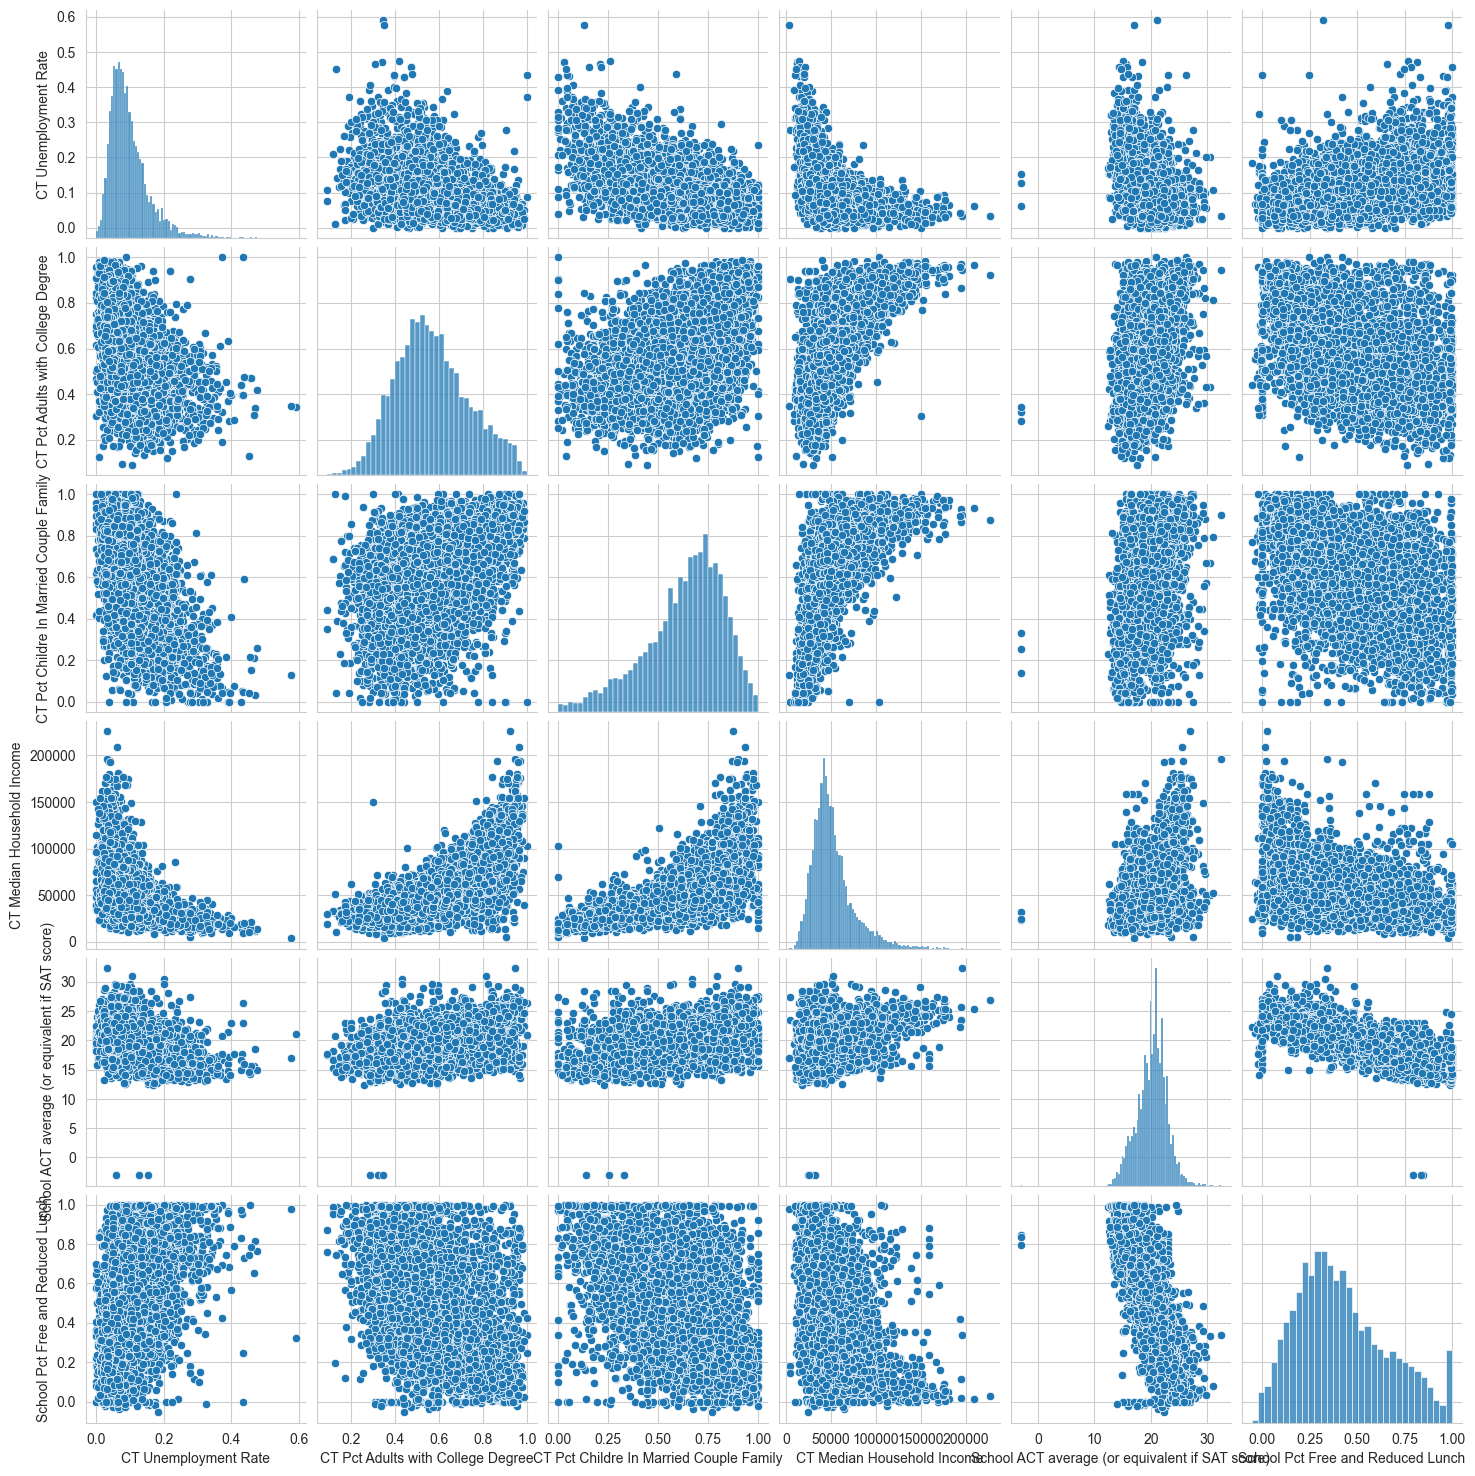

In [12]:
sns.pairplot(
    edgap.drop(columns="NCESSCH School ID"));

plt.show()

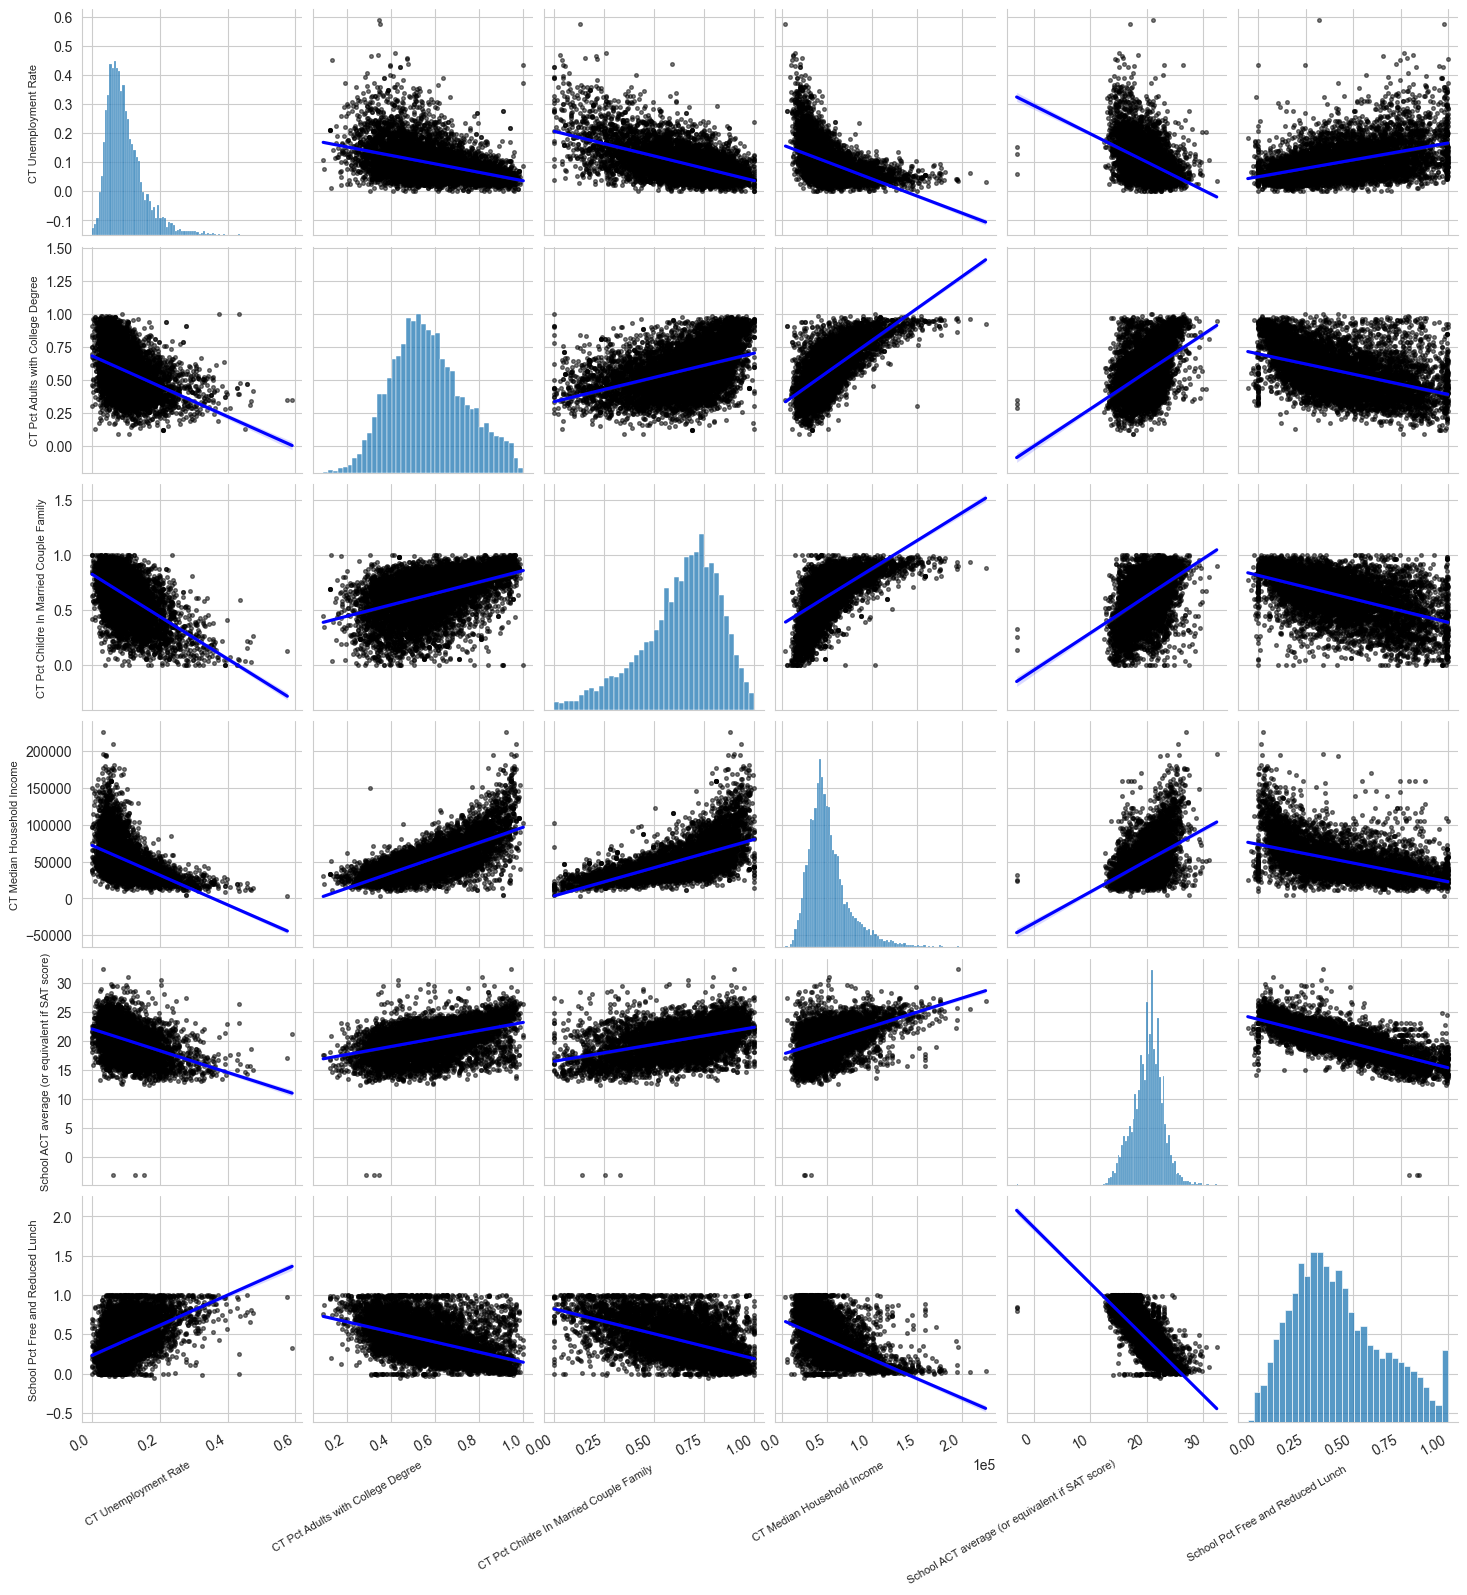

In [13]:
fig = sns.pairplot(
    edgap.drop(columns="NCESSCH School ID"),
    kind="reg",
    plot_kws={
        "line_kws": {"color": "blue"},
        "scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
    },
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')  # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size

    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')


plt.show()

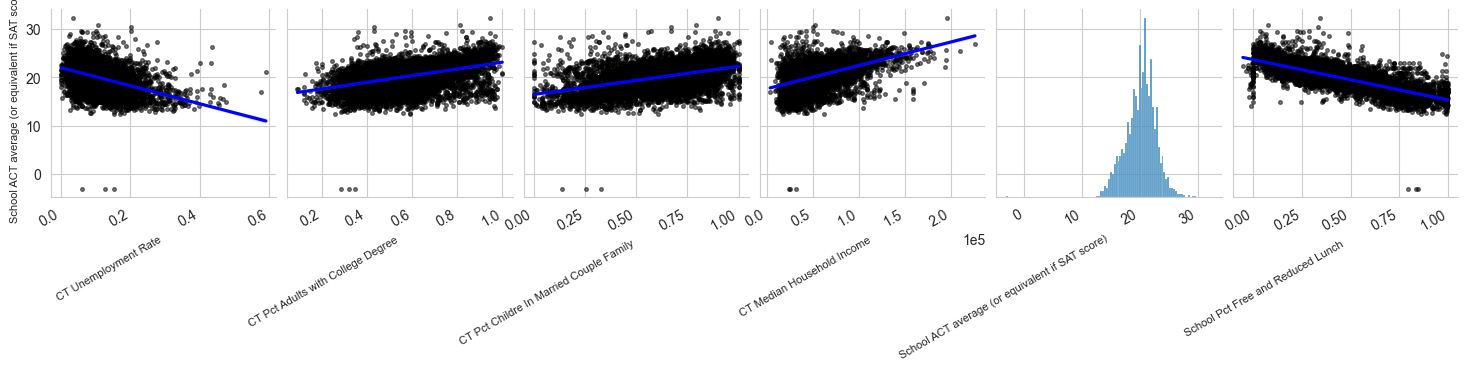

In [14]:
fig = sns.pairplot(
    edgap.drop(columns="NCESSCH School ID"),
    y_vars=['School ACT average (or equivalent if SAT score)'],
    kind="reg",
    plot_kws={
        "line_kws": {"color": "blue"},
        "scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
    },
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')  # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size

    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

#### There appears to be a relationship between the socioeconomic variables and the ACT score, especially in the second pairplot analysis.

#### There are some outlier out-of-range ACT and percent lunch values that will need to investigate as we proceed.

#### It seems that this data is worth exploring further based on our pairplot analysis.

## Data Preparation

### Select relevant subsets of the data

#### For our school_information dataframe, we need the year, school identity, location, and school type information (SCHOOL_YEAR, NCESSSCH, LSTATE, LZIP, SCH_TYPE_TXT, LEVEL).

#### For our school_title dataframe, We need the 12-digit school_id and the Title-1 eligibility status.

In [16]:
school_information = school_information[['SCHOOL_YEAR', 'NCESSCH', 'LSTATE', 'LZIP', 'SCH_TYPE_TEXT', 'LEVEL']]

In [17]:
school_title = school_title[["School ID (12-digit) - NCES Assigned [Public School] Latest available year","Title I Eligible School [Public School] 2016-17"]]

In [18]:
school_title.head()

School ID (12-digit) - NCES Assigned [Public School] Latest available year  \
0                                       2.507320e+11                            
1                                       3.200060e+11                            
2                                       3.200060e+11                            
3                                       5.304860e+11                            
4                                       2.708190e+11                            

  Title I Eligible School [Public School] 2016-17  
0                                           1-Yes  
1                                           1-Yes  
2                                           1-Yes  
3                                            2-No  
4                                             â

In [19]:
school_information.head()

SCHOOL_YEAR       NCESSCH LSTATE   LZIP       SCH_TYPE_TEXT LEVEL
0   2016-2017  1.000020e+10     AL  35220  Alternative School  High
1   2016-2017  1.000020e+10     AL  36067  Alternative School  High
2   2016-2017  1.000020e+10     AL  36784  Alternative School  High
3   2016-2017  1.000020e+10     AL  36057  Alternative School  High
4   2016-2017  1.000020e+10     AL  35206  Alternative School  High

### Rename Columns

#### We will rename the columns to follow best practices of style and being informative.

In [20]:
edgap = edgap.rename(
    columns={
        "NCESSCH School ID": "id",
        "CT Pct Adults with College Degree": "percent_college",
        "CT Unemployment Rate": "rate_unemployment",
        "CT Pct Childre In Married Couple Family": "percent_married",
        "CT Median Household Income": "median_income",
        "School ACT average (or equivalent if SAT score)": "average_act",
        "School Pct Free and Reduced Lunch": "percent_lunch",
    }
)

In [21]:
school_information = school_information.rename(
    columns={
        "SCHOOL_YEAR": "year",
        "NCESSCH": "id",
        "LSTATE": "state",
        "LZIP": "zip_code",
        "SCH_TYPE_TEXT": "school_type",
        "LEVEL": "school_level",
    }
)

In [22]:
school_title = school_title.rename(
    columns={
        "School ID (12-digit) - NCES Assigned [Public School] Latest available year": "id",
        "Title I Eligible School [Public School] 2016-17": "Title_1"
    }
)

In [23]:
school_title.head()

id Title_1
0  2.507320e+11   1-Yes
1  3.200060e+11   1-Yes
2  3.200060e+11   1-Yes
3  5.304860e+11    2-No
4  2.708190e+11     â

#### 3. We are ready to join the data frames.

### Join data frames

#### We want to join the DataFrames using the identity of the school as the key. The identity is given by the NCESSCH school identity. The value is an object in the EdGap data set and a float64 in the school information and school title data set, while it is an int64 in the EdGap datasets.

#### With this in mind, we will cast the id column in the school_information DataFrame as an object.

In [24]:
school_information['id'] = school_information['id'].astype('object')

In [25]:
school_title['id'] = school_title['id'].astype('object')

In [26]:
edgap['id'] = edgap['id'].astype('object')

In [27]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          102183 non-null  object
 1   id            102181 non-null  object
 2   state         102183 non-null  object
 3   zip_code      102183 non-null  object
 4   school_type   102181 non-null  object
 5   school_level  102179 non-null  object
dtypes: object(6)
memory usage: 4.7+ MB


In [28]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7986 non-null   object 
 1   rate_unemployment  7972 non-null   float64
 2   percent_college    7973 non-null   float64
 3   percent_married    7961 non-null   float64
 4   median_income      7966 non-null   float64
 5   average_act        7986 non-null   float64
 6   percent_lunch      7986 non-null   float64
dtypes: float64(6), object(1)
memory usage: 436.9+ KB


In [29]:
school_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99860 entries, 0 to 99859
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       99858 non-null  object
 1   Title_1  99853 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [202]:
school_title.head()

id Title_1
0  10000200277.0   1-Yes
1  10000201667.0   1-Yes
2  10000201670.0   1-Yes
3  10000201705.0    2-No
4  10000201706.0     â

In [203]:
edgap.head()

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   
3  100017000029           0.044739         0.692062         0.641283   
4  100018000040           0.077014         0.640060         0.834402   

   median_income  average_act  percent_lunch  
0        42820.0    20.433455       0.066901  
1        89320.0    19.498168       0.112412  
2        84140.0    19.554335       0.096816  
3        56500.0    17.737485       0.296960  
4        54015.0    18.245421       0.262641

In [204]:
school_information.head()

year             id state zip_code         school_type school_level
0  2016-2017  10000200277.0    AL    35220  Alternative School         High
1  2016-2017  10000201667.0    AL    36067  Alternative School         High
2  2016-2017  10000201670.0    AL    36784  Alternative School         High
3  2016-2017  10000201705.0    AL    36057  Alternative School         High
4  2016-2017  10000201706.0    AL    35206  Alternative School         High

In [227]:
df1 = edgap.merge(
    school_information,
    how='left',
    on='id'
)

In [228]:
df = df1.merge(
    school_title,
    how='left',
    on='id'
)

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7986 non-null   object 
 1   rate_unemployment  7972 non-null   float64
 2   percent_college    7973 non-null   float64
 3   percent_married    7961 non-null   float64
 4   median_income      7966 non-null   float64
 5   average_act        7986 non-null   float64
 6   percent_lunch      7986 non-null   float64
 7   year               7898 non-null   object 
 8   state              7898 non-null   object 
 9   zip_code           7898 non-null   object 
 10  school_type        7898 non-null   object 
 11  school_level       7898 non-null   object 
 12  Title_1            7831 non-null   object 
dtypes: float64(6), object(7)
memory usage: 811.2+ KB


#### We joined the data sets using the school id as the key successfully, so now we can proceed with quality control.

## Quality Control

#### To get a better summary of our data, we can use the describe() method to compute descriptive statistics.

In [230]:
df.describe()

rate_unemployment  percent_college  percent_married  median_income  \
count        7972.000000      7973.000000      7961.000000    7966.000000   
mean            0.098730         0.568930         0.633440   52026.905222   
std             0.058959         0.165704         0.196764   24228.057079   
min             0.000000         0.091493         0.000000    3589.000000   
25%             0.058655         0.450828         0.523810   36597.250000   
50%             0.085649         0.554979         0.667594   46833.500000   
75%             0.123376         0.676571         0.777135   61369.250000   
max             0.590278         1.000000         1.000000  226181.000000   

       average_act  percent_lunch  
count  7986.000000    7986.000000  
mean     20.181532       0.420651  
std       2.595201       0.239754  
min      -3.070818      -0.054545  
25%      18.600000       0.238501  
50%      20.400000       0.381570  
75%      21.910867       0.575447  
max      32.362637       0.998729

In [231]:
df.loc[df['percent_lunch'] < 0, 'percent_lunch'] = np.nan

In [232]:
df.loc[df['average_act'] < 1, 'average_act'] = np.nan

In [233]:
df['school_type'].value_counts()

school_type
Regular School                 7885
Alternative School               10
Special Education School          2
Career and Technical School       1
Name: count, dtype: int64

In [234]:
df['school_level'].value_counts()

school_level
High            7230
Other            631
Not reported      35
Elementary         2
Name: count, dtype: int64

In [235]:
df['Title_1'].value_counts()

Title_1
1-Yes    5429
2-No     2010
â        349
â        43
Name: count, dtype: int64

In [288]:
df = df.loc[df['school_level'] == 'High']

In [237]:
df.duplicated().sum()

np.int64(0)

In [239]:
df.isna().sum().to_frame(name='Number of Missing Values')

Number of Missing Values
id                                        0
rate_unemployment                        12
percent_college                          11
percent_married                          20
median_income                            16
average_act                               3
percent_lunch                            20
year                                      0
state                                     0
zip_code                                  0
school_type                               0
school_level                              0
Title_1                                  66

In [268]:
df['Title_1'].value_counts()

Title_1
1-Yes    4967
2-No     1837
â        315
â        42
Name: count, dtype: int64

In [269]:
percent_missing = df.isna().mean().round(4) * 100

percent_missing.to_frame(name='Percent Missing Values')

Percent Missing Values
id                                   0.00
rate_unemployment                    0.17
percent_college                      0.15
percent_married                      0.28
median_income                        0.22
average_act                          0.00
percent_lunch                        0.28
year                                 0.00
state                                0.00
zip_code                             0.00
school_type                          0.00
school_level                         0.00
Title_1                              0.91

In [270]:
df['state'].value_counts()

state
TX    913
OH    654
IL    564
PA    543
MI    498
NC    407
FL    404
GA    367
WI    351
NJ    338
MO    337
IN    321
NY    295
TN    265
WA    263
MA    253
KY    198
LA    194
WY     38
DE     24
Name: count, dtype: int64

In [271]:
df['state'].nunique()

20

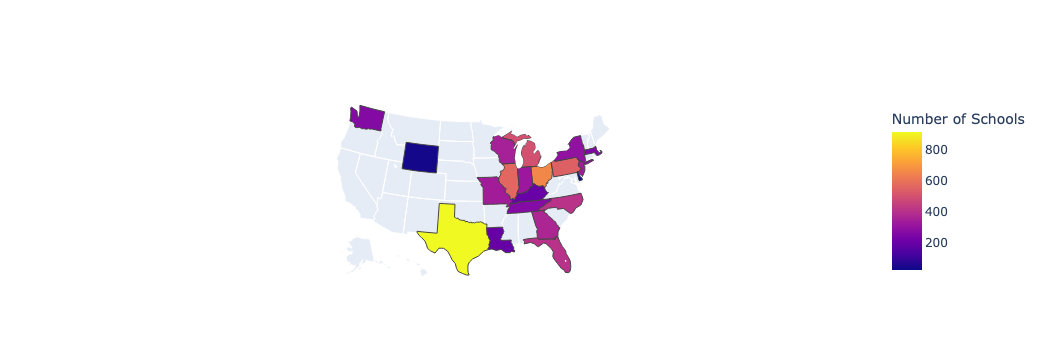

In [272]:
layout = dict(
    geo={"scope": "usa"}, coloraxis_colorbar=dict(title="Number of Schools")
)

data = dict(
    type="choropleth",
    locations=df["state"].value_counts().index,
    locationmode="USA-states",
    z=df["state"].value_counts().values,
    coloraxis="coloraxis",
)

x = pg.Figure(data=[data], layout=layout)

po.iplot(x)

In [286]:
df = df.dropna(subset=['average_act'])

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7227 entries, 0 to 7985
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7227 non-null   object 
 1   rate_unemployment  7215 non-null   float64
 2   percent_college    7216 non-null   float64
 3   percent_married    7207 non-null   float64
 4   median_income      7211 non-null   float64
 5   average_act        7227 non-null   float64
 6   percent_lunch      7207 non-null   float64
 7   year               7227 non-null   object 
 8   state              7227 non-null   object 
 9   zip_code           7227 non-null   object 
 10  school_type        7227 non-null   object 
 11  school_level       7227 non-null   object 
 12  Title_1            7161 non-null   object 
dtypes: float64(6), object(7)
memory usage: 790.5+ KB


In [275]:
df.isna().sum().to_frame(name='Number of Missing Values')

Number of Missing Values
id                                        0
rate_unemployment                        12
percent_college                          11
percent_married                          20
median_income                            16
average_act                               0
percent_lunch                            20
year                                      0
state                                     0
zip_code                                  0
school_type                               0
school_level                              0
Title_1                                  66

#### If we drop rows that have NaNs for any socioeconomic variables, then we will negatively affect our analysis using the variables where data were present. So, we will not drop the rows in this data set that are missing the socioeconomic variables. We will impute the missing values.

#### We set out-of-range values to NaN and will impute them.

#### We kept only high schools.

#### We removed schools where we do not have the ACT score.

#### Many schools are missing from the data by omission.

#### We will impute missing values of socioeconomic variables.

## Data Imputation

#### Define the predictor variables to be rate_unemployment, percent_college, percent_married, median_income, percent_lunch, state, and Title_1.

In [276]:
df_gd = pd.get_dummies(df,columns=['Title_1'],dtype=float)

In [277]:
df_gd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7227 entries, 0 to 7985
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7227 non-null   object 
 1   rate_unemployment  7215 non-null   float64
 2   percent_college    7216 non-null   float64
 3   percent_married    7207 non-null   float64
 4   median_income      7211 non-null   float64
 5   average_act        7227 non-null   float64
 6   percent_lunch      7207 non-null   float64
 7   year               7227 non-null   object 
 8   state              7227 non-null   object 
 9   zip_code           7227 non-null   object 
 10  school_type        7227 non-null   object 
 11  school_level       7227 non-null   object 
 12  Title_1_1-Yes      7227 non-null   float64
 13  Title_1_2-No       7227 non-null   float64
 14  Title_1_â        7227 non-null   float64
 15  Title_1_â         7227 non-null   float64
dtypes: float64(10), object(6)
mem

In [278]:
predictor_variables = [
    'rate_unemployment',
    'percent_college',
    'percent_married',
    'median_income',
    'percent_lunch',
    'state',
    'Title_1_1-Yes'
]

In [279]:
imputer = IterativeImputer()

### Fit the imputer using the numerical predictor variables.

#### Define the columns you want to use in the imputation process

In [280]:
numerical_predictors = df_gd[predictor_variables].select_dtypes(include='number').columns.to_list()

print(numerical_predictors)

['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch', 'Title_1_1-Yes']


#### Fit the imputer and impute the missing data.

In [281]:
imputer.fit(df_gd.loc[:, numerical_predictors])

IterativeImputer()

In [282]:
df_gd.loc[:, numerical_predictors] = imputer.transform(df_gd.loc[:, numerical_predictors])

In [285]:
df_gd.isna().sum().to_frame(name='Number of Missing Values')

Number of Missing Values
id                                        0
rate_unemployment                         0
percent_college                           0
percent_married                           0
median_income                             0
average_act                               0
percent_lunch                             0
year                                      0
state                                     0
zip_code                                  0
school_type                               0
school_level                              0
Title_1_1-Yes                             0
Title_1_2-No                              0
Title_1_â                               0
Title_1_â                                0

In [341]:
df_gd['Title_1_1-Yes'] = df_gd['Title_1_1-Yes'].astype('object')

In [342]:
df_gd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7227 entries, 0 to 7985
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7227 non-null   object 
 1   rate_unemployment  7227 non-null   float64
 2   percent_college    7227 non-null   float64
 3   percent_married    7227 non-null   float64
 4   median_income      7227 non-null   float64
 5   average_act        7227 non-null   float64
 6   percent_lunch      7227 non-null   float64
 7   year               7227 non-null   object 
 8   state              7227 non-null   object 
 9   zip_code           7227 non-null   object 
 10  school_type        7227 non-null   object 
 11  school_level       7227 non-null   object 
 12  Title_1_1-Yes      7227 non-null   object 
 13  Title_1_2-No       7227 non-null   float64
 14  Title_1_â        7227 non-null   float64
 15  Title_1_â         7227 non-null   float64
dtypes: float64(9), object(7)
memo

In [348]:
df_gd = df_gd.rename(
    columns={ 'Title_1_1-Yes' = 'Title_1'})

SyntaxError: cannot assign to literal here. Maybe you meant '==' instead of '='? (810446791.py, line 2)

In [343]:
df_gd.to_csv(
    'final_education_clean.csv',
    encoding='utf-8-sig',
    index=False)

### Summary

#### We used an interative imputer to estimate missing values of numerical predictor variables

#### We saved the clean data frame as a csv file.

## Exploratory Data Analysis

#### Load Clean Data

In [344]:
df = pd.read_csv('https://raw.githubusercontent.com/CameronMangione/education/refs/heads/main/code/final_education_clean.csv')

In [345]:
df['Title_1_1-Yes'].value_counts()

Title_1_1-Yes
1.0    4967
0.0    2260
Name: count, dtype: int64

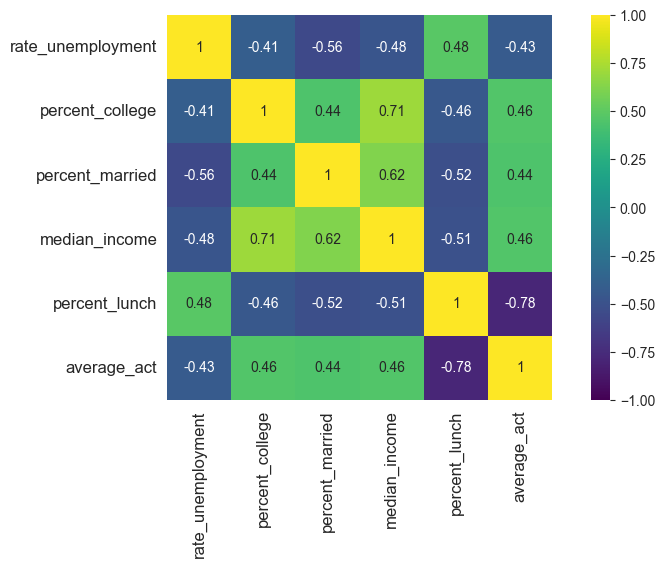

In [346]:
predictor_variables = ['rate_unemployment', 'percent_college', 'percent_married', 'median_income','percent_lunch']

numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = df[numerical_predictors+ ["average_act"]].corr()

plt.figure(figsize=(10,5))

sns.heatmap(corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis")

plt.tick_params(labelsize=12)

plt.show()

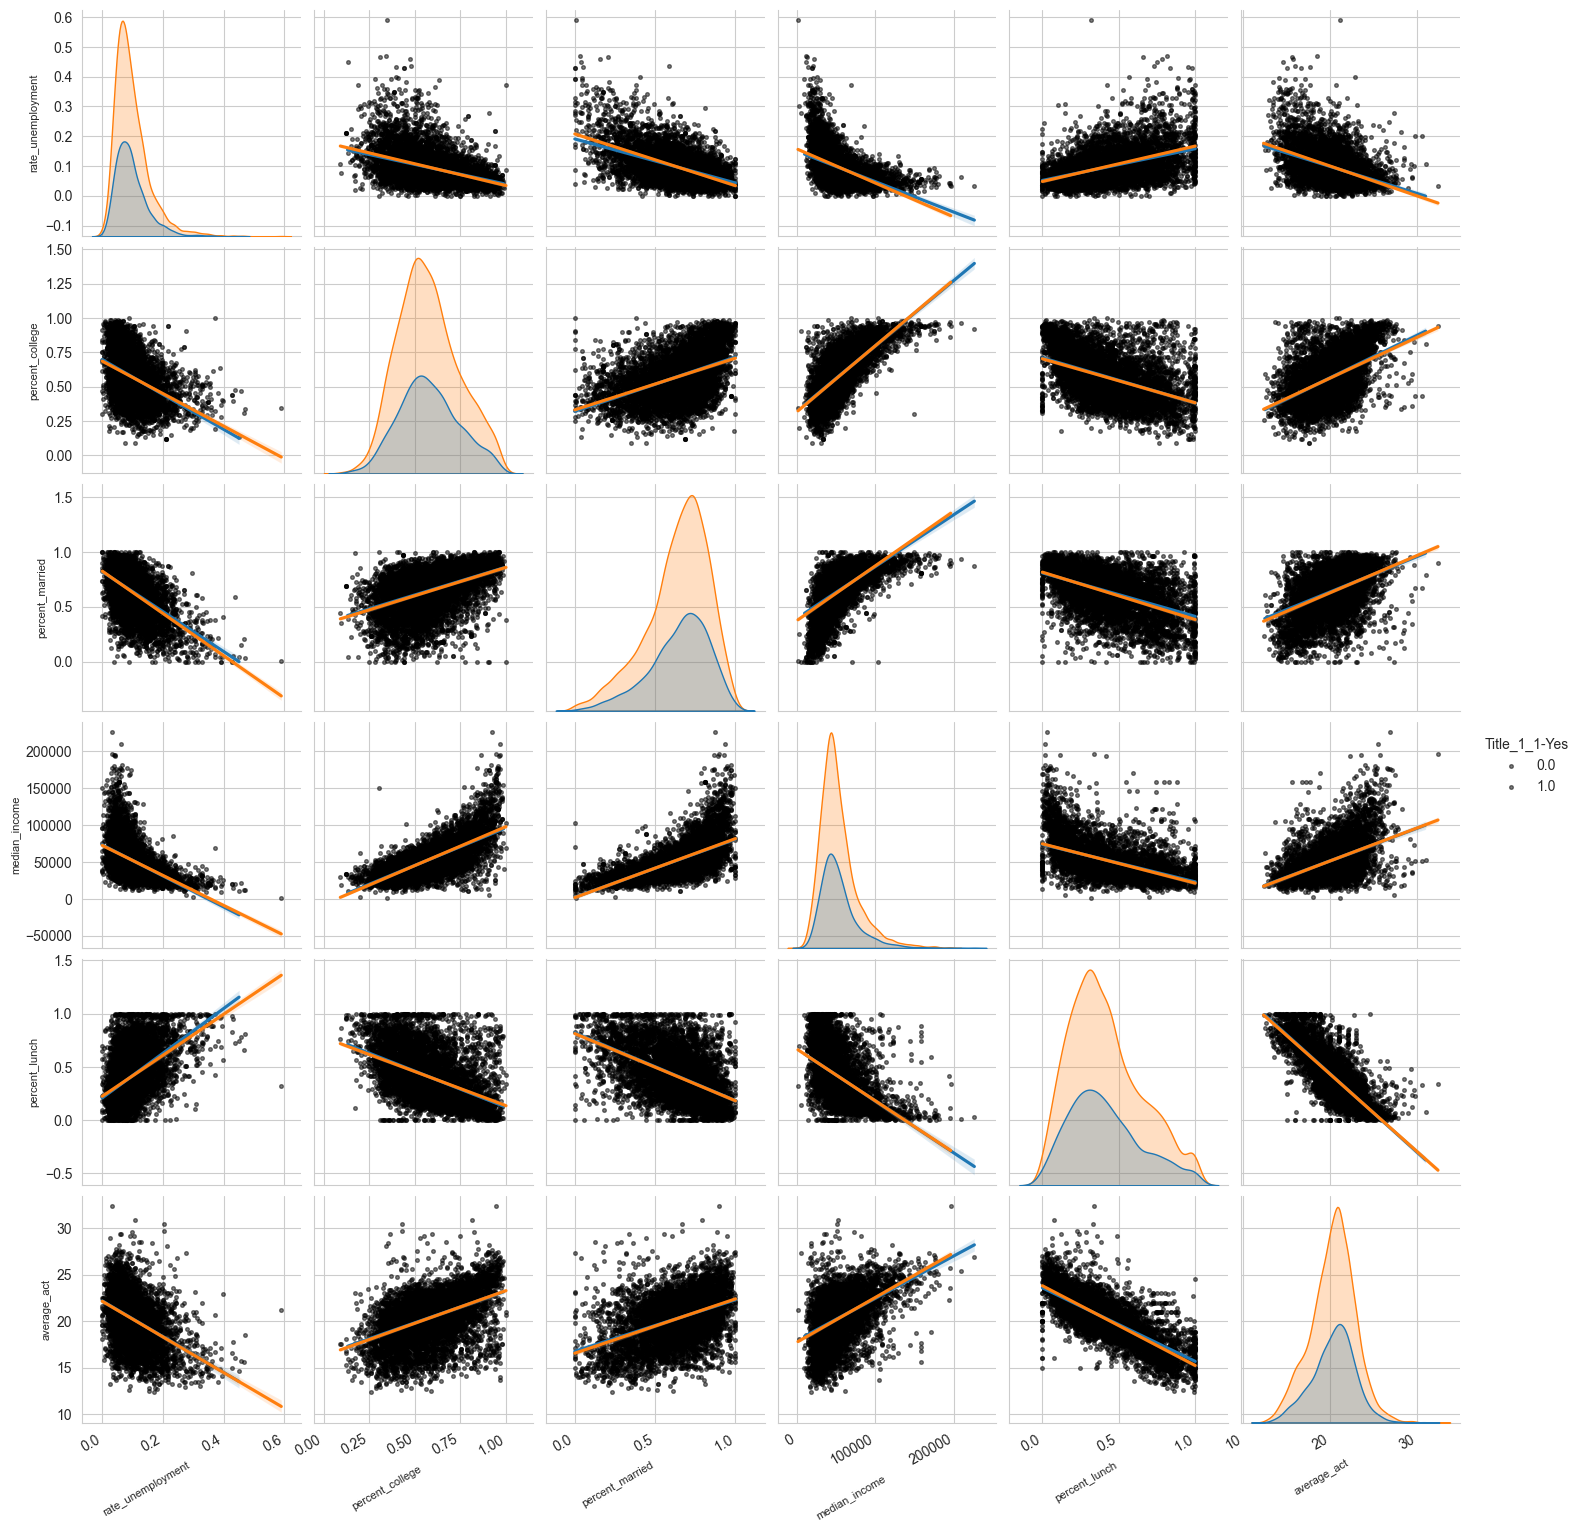

In [347]:
fig = sns.pairplot(
    data=df,
    vars=numerical_predictors + ['average_act'],
    hue='Title_1_1-Yes',
    kind="reg",
    plot_kws={"scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
    },
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')  # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size

    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

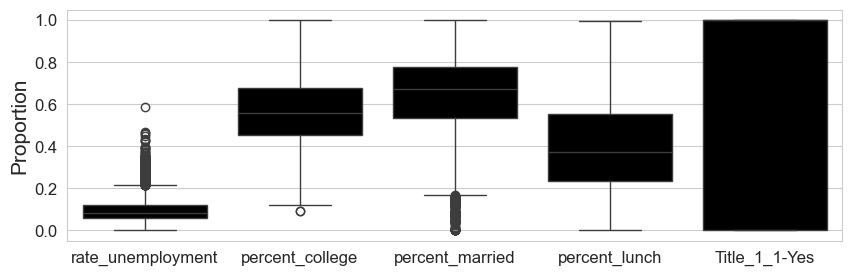

In [296]:
plt.figure(figsize=(10,3))

fractions = list(numerical_predictors)
fractions.remove('median_income')

sns.boxplot(data=df[fractions], color='k')

plt.ylabel('Proportion', fontsize=15)

plt.tick_params(labelsize=12)

plt.show()

### Summary

#### The numerical predictos are related to average_act. Relationship is roughly linear.

#### Numberical predictors are correlated with each other, suggesting not all predictors will be necessary.

#### Some variables have skewed distributions, suggesting transformations of input variables might be useful.

#### There are outliers in rate_unemployment, percent_college, percent_married and median_income, which reflect skewed distributions. a Log transformation to these predictors might be useful when exploring different models.

#### Relationships are similar across charter and non-charter schools,  but there could be significant difference regardless.

## Modeling

### Single input models

#### Fit and assess models predicting the average ACT score from each of the input variables, such as polynoial linear regressions.

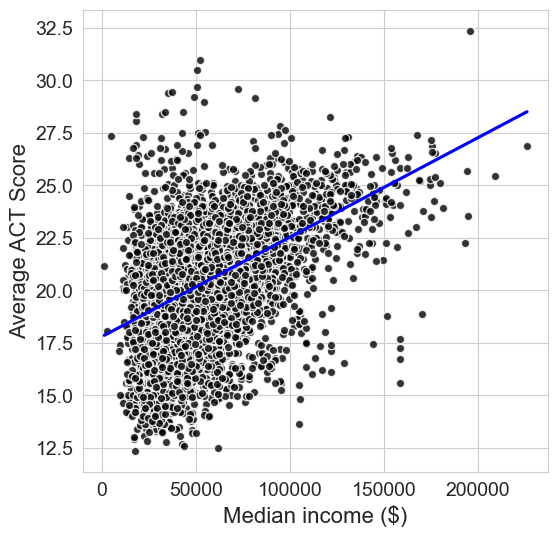

In [297]:
plt.figure(figsize=(6,6))

sns.regplot(data=df,
            x = 'median_income',
            y = 'average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

#Add axis labels
plt.xlabel('Median income ($)', fontsize=16)
plt.ylabel('Average ACT Score', fontsize=16)

#Increase the fontsize of the tick labels
plt.tick_params(labelsize=14)

plt.show()

#### Fit the simple linear regression model

In [298]:
model_median_income = smf.ols(formula='average_act ~ median_income', data=df).fit()

In [299]:
print(model_median_income.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     1934.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        19:04:56   Log-Likelihood:                -16043.
No. Observations:                7227   AIC:                         3.209e+04
Df Residuals:                    7225   BIC:                         3.210e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        17.8026      0.063    284.793

#### Numerical assessment of fit accuracy

#### Compute the R-Suqared

In [300]:
model_median_income.rsquared

np.float64(0.2111864260195827)

#### Compute the RMSE

In [302]:
y_hat = model_median_income.predict()

In [303]:
np.sqrt(mean_squared_error(df['average_act'], y_hat)).round(3)

np.float64(2.228)

#### Compute the mean absolute error

In [304]:
mean_absolute_error(df['average_act'], y_hat)

1.7129378018104484

#### Use a residual plot for graphical assessment of model fit

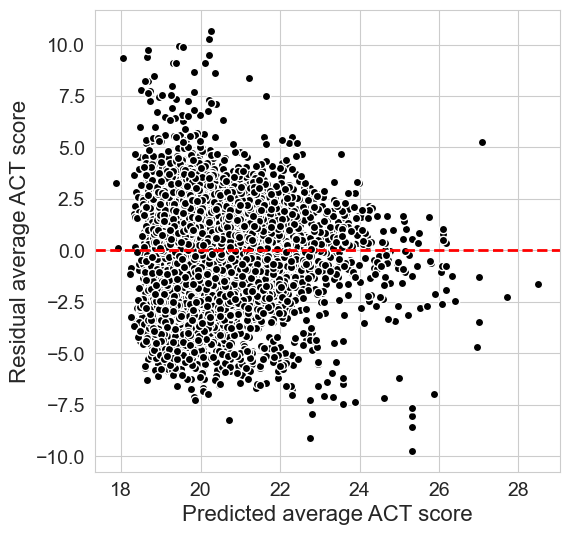

In [305]:
plt.figure(figsize=(6, 6))

plt.plot(y_hat, model_median_income.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

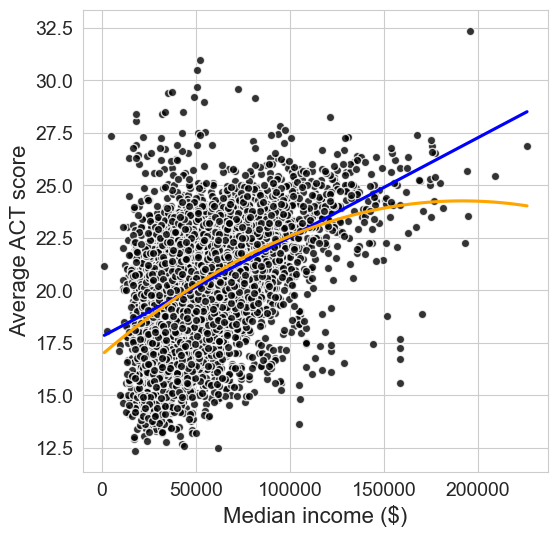

In [306]:
plt.figure(figsize=(6,6))

sns.regplot(data=df,
            x= 'median_income',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

sns.regplot(data=df,
            x= 'median_income',
            y='average_act',
            order =2,
            color='orange',
            ci=False,
            scatter=False)

# Add axis labels
plt.xlabel('Median income ($)', fontsize=16)
plt.ylabel('Average ACT score', fontsize=16)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14)

plt.show()

In [307]:
model_median_income2 = smf.ols(formula='average_act ~ median_income + I(median_income**2)',data=df).fit()

In [308]:
print(model_median_income2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     1013.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        19:09:08   Log-Likelihood:                -16007.
No. Observations:                7227   AIC:                         3.202e+04
Df Residuals:                    7224   BIC:                         3.204e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                16.94

In [309]:
model_median_income2.pvalues

Intercept                0.000000e+00
median_income            2.628358e-99
I(median_income ** 2)    1.394067e-17
dtype: float64

In [310]:
anova_lm(model_median_income, model_median_income2)

df_resid           ssr  df_diff     ss_diff          F        Pr(>F)
0    7225.0  35865.015694      0.0         NaN        NaN           NaN
1    7224.0  35505.096451      1.0  359.919243  73.230518  1.394067e-17

In [311]:
mean_absolute_error(df['average_act'], model_median_income2.predict())

1.6972371229525667

In [312]:
mean_absolute_error(df['average_act'], model_median_income.predict())

1.7129378018104484

### Multiple Linear Regression Model

In [313]:
model = smf.ols(
    formula='average_act ~ rate_unemployment + percent_college + percent_married + median_income +percent_lunch',
    data=df).fit()

In [314]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     2438.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        19:10:00   Log-Likelihood:                -13328.
No. Observations:                7227   AIC:                         2.667e+04
Df Residuals:                    7221   BIC:                         2.671e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.6973      0.13

In [315]:
y_hat = model.predict()

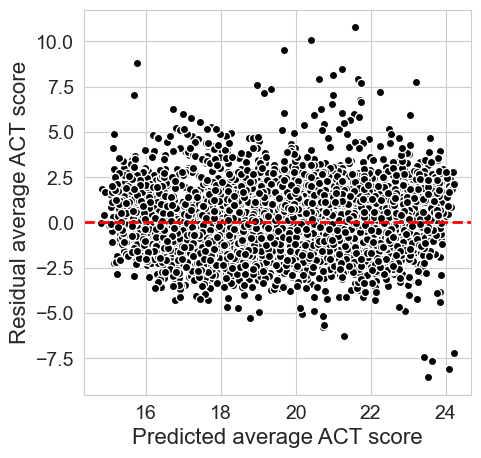

In [316]:
plt.figure(figsize=(5, 5))

plt.plot(y_hat, model.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

In [317]:
mean_absolute_error(df['average_act'], model.predict())

1.1453231762802607

### Summary

#### Multiple linear regression with all socioeconomic predictors can predict ACT scores with an average erro of roughly 1 point using these predictors.

#### Residual plot suggests that there will be limited imporvement from adding transformations of these predictors.

#### Not all predictors have significant coefficients.

#### Adding predictors to the model may improve performances.

### Reduced Model

In [319]:
model_reduced = smf.ols(formula='average_act ~ rate_unemployment + percent_lunch',data=df).fit()

In [320]:
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     5857.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        19:11:38   Log-Likelihood:                -13418.
No. Observations:                7227   AIC:                         2.684e+04
Df Residuals:                    7224   BIC:                         2.686e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            23.9116      0.04

In [321]:
y_hat = model_reduced.predict()

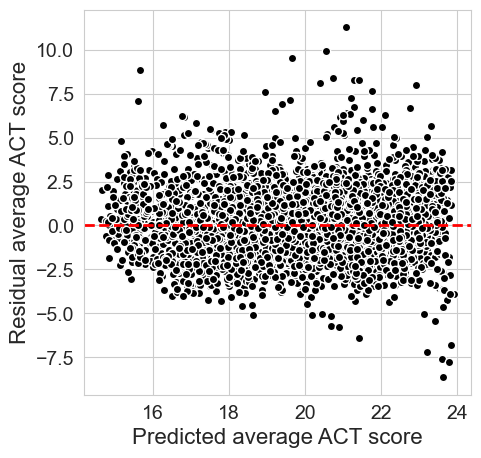

In [322]:
plt.figure(figsize=(5, 5))

plt.plot(y_hat, model_reduced.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

In [323]:
mean_absolute_error(df['average_act'], model_reduced.predict())

1.1615499262496836

In [324]:
mae_full = mean_absolute_error(df['average_act'], model.predict())
mae_reduced = mean_absolute_error(df['average_act'], model_reduced.predict())

r2_full = model.rsquared
r2_reduced = model_reduced.rsquared

pd.DataFrame({'Mean Absolute Error': [mae_full, mae_reduced],
              'R-squared': [r2_full, r2_reduced]},
             index=['full model', 'reduced model']).round(4)

Mean Absolute Error  R-squared
full model                  1.1453     0.6280
reduced model               1.1615     0.6185

In [325]:
anova_lm(model_reduced, model)

df_resid           ssr  df_diff     ss_diff          F        Pr(>F)
0    7224.0  17343.771345      0.0         NaN        NaN           NaN
1    7221.0  16915.713940      3.0  428.057404  60.909884  6.987404e-39

### Summary

#### The model predicting the average ACT score from rate_unemployment, percent_college and percent_lunch is not significantly different than the model with a ll five socioeconomic variables as predictors.

#### Adding predictors to the model may improve the performance.

#### We have not yet determined the relative importance of each predictor in the model.

### Scaling

#### Scale the predictor variables in the reduced model to have mean 0 and standard deviation 1 and add them to the data frame.

In [327]:
predictor_variables = ['rate_unemployment', 'percent_college', 'percent_lunch']

In [328]:
scaled_columns = [var + '_normalized' for var in predictor_variables]
print(scaled_columns)

['rate_unemployment_normalized', 'percent_college_normalized', 'percent_lunch_normalized']


In [329]:
scaler = StandardScaler().fit(df[predictor_variables])

In [330]:
df[scaled_columns] = scaler.transform(df[predictor_variables])

In [331]:
df[scaled_columns].agg(['mean','std']).round(3)

rate_unemployment_normalized  percent_college_normalized  \
mean                          -0.0                        -0.0   
std                            1.0                         1.0   

      percent_lunch_normalized  
mean                       0.0  
std                        1.0

#### Fit the multiple linear regression model with the normalized predictors.

In [332]:
model_normalized = smf.ols(formula='average_act ~ rate_unemployment_normalized + percent_college_normalized + percent_lunch_normalized',data=df).fit()

In [333]:
print(model_normalized.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     4063.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        19:14:03   Log-Likelihood:                -13328.
No. Observations:                7227   AIC:                         2.666e+04
Df Residuals:                    7223   BIC:                         2.669e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [334]:
mae_normalized = mean_absolute_error(df['average_act'], model_normalized.predict())
mae_reduced = mean_absolute_error(df['average_act'], model_reduced.predict())

r2_normalized = model_normalized.rsquared
r2_reduced = model_reduced.rsquared

pd.DataFrame({'Mean Absolute Error': [mae_normalized, mae_reduced],
              'R-squared': [r2_normalized, r2_reduced]},
             index=['normalized model', 'reduced model']).round(4)

Mean Absolute Error  R-squared
normalized model               1.1455     0.6279
reduced model                  1.1615     0.6185

## Conclusion